<img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/NSF-Unidata_lockup_vertical_2023.png" width="150px" align="right">

# Machine Learning Analysis in the Earth Systems Sciences

In this module, you are tasked with planning, implementing, and evaluating a machine learning solution for a real-world scenario. Given pre-configured code blocks and prepared data, you will create a problem statement, explore the data, experiment with model development, and ultimately make a recommendation on the utility of machine learning for your scenario.

# Damaged weather station in western North Carolina

In the fall of 2024, a major hurricane devastated western North Carolina and Appalachia. This caused widespread damage, including damage to important weather observing instruments. Play the video below to learn more about the situation, and how machine learning might be a helpful tool.<br><i>Video opens in a new tab.</i>

<a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/wncvideo" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/stationsslides_thumb.png" width="600 px">
</a>

<a href="https://www.google.com/url?q=https://docs.google.com/document/d/e/2PACX-1vRfYtUFjLVfNadQ0nvUv4E8MzfaXmQwt_WcP0haCo5bH1J0zGZiupiJz7XuLsun2BqN-g_ubbACpx6p/pub&sa=D&source=docs&ust=1738596555923034&usg=AOvVaw2xJ1FEg1SflwC6i3P5uQqD" target="blank">Transcript</a>

<div class="alert alert-info" role="alert">
<p class="admonition-title" style="font-weight:bold">What is a data engineer?</p>
    <p>Your team includes yourself, your team lead, and a data engineer. Data engineering is an emerging career that encompasses the collection, storage, and pre-processing of data in data science disciplines. You will see the type of work that the data engineer on your team does in <i>Part 2: Data Handling.</i></p>
    <p><a href="https://www.mongodb.com/resources/basics/data-engineering#what-is-data-engineering" target="blank">Learn more</a></p>
</div>
<br><br>

Now you will begin the process of following the supervised machine learning model framework to address this task, starting with <b>problem framing</b>.
<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>
<br><br>

## Part 1: Problem Framing

Based on the information provided in the video, which type of machine learning analysis is most appropriate for this scenario? 

> **Instructions**
> 
> Execute the two cells below. After executing `display_knowledgecheck()`, select the corresponding button to check your understanding.

In [1]:
# First import the Python tools needed to display the buttons
# This cell may take a moment to complete
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, HTML, IFrame

from analysis_tech import display_knowledgecheck

In [ ]:
display_knowledgecheck()

HTML(value='Which type of machine learning analysis is most appropriate for this scenario?')

Output()

#### Problem framing questions
As a part of the problem framing step, we must answer a series of questions to ensure we're creating the best solution for this scenario. 

***Does a simpler solution exist?***

&emsp;From the video, we know that your team has already completed a preliminary analysis that averaged values from nearby stations to Mt Mitchell. While these results showed some skill, there is room for improvement. 

***Can machine learning requirements be met?***

&emsp;The NC ECONet data provider has decades of hourly data available from several weather stations. This is sufficient for your model. 

***Which scientific question should be answered?***

&emsp;You will answer this question in **Exercise 1** below. 

<br>

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 1</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 1. Then type the scientific question to be answered for this situation.</p>
</div>
<br>

*** 

<br>

## Part 2: Data Handling

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>
<br><br>

Recall that data handling is often the most time-consuming step of developing a machine learning model. Data handling comes in three parts:
1. Locate data of interest
2. Explore data
3. Create a data splitting strategy

Your team's data engineer has located the data and completed the pre-processing for you already. You will continue with your own independent exploration of the data and then create a data splitting strategy. 

<br>

### Part 2a: Locate Data of Interest

You will be using other stations in the <a href="https://econet.climate.ncsu.edu/" target="blank">NC ECONet</a> for this project. Below is a document that your team's data engineer has prepared for you describing the nature of the dataset that will be used to create the machine learning model. <br><br>

<div class="alert alert-info" role="alert">

### Metadata Document for Western North Carolina Weather Station Data

#### General Information

Dataset Name: Western NC Weather Station Time-Series Data

Description: This dataset contains tabular time series data collected from multiple surface weather stations in Western North Carolina. The data includes atmospheric and environmental variables recorded at hourly intervals.

Date Range: January 1, 2015, to December 16, 2024

Geographic Coverage: Western North Carolina 

Data Frequency: Hourly

Last Updated: Jan 1, 2025

#### Data Structure

File Format: .parquet

Number of Records: 69,760 per station per environmental variable (feature)

Columns (Features) 

- observation_datetime: Date and time of observation in UTC

Columns (features) per Station (XXXX):

- XXXX_airtemp_degF (°F): Air temperature measured at 2 meters above ground level
- XXXX_windspeed_mph (mph): Average wind speed during the hour at 10 meters above ground level
- XXXX_winddgust_mph (mph): Peak wind gust during the hour at 10 meters above ground level
- XXXX_rh_percent (%): Average Relative humidity
- XXXX_precip_in (in): Total precipitation accumulated in the hour

Stations:

- BEAR (Bearwallow Mountain)
- BURN (Burnsville Tower)
- FRYI (Frying Pan Mountain)
- JEFF (Mount Jefferson Tower)
- **MITC (Mount Mitchell State Park) - target station**
- NCAT (North Carolina A&T University Research Farm)
- SALI (Piedmont Research Station)
- SASS (Sassafrass Mountain)
- UNCA (University of North Carolina - Asheville Weather Tower)
- WINE (Wayah Bald Mountain)

<a href="https://econet.climate.ncsu.edu/" target="blank">More station info</a>

#### Data Quality

Missing Data: Missing data (aside from MITC) was filled in using seasonal values and simple interpolation.

Outlier Handling: No outlier handling was done. 

#### Data Provenance

Source: North Carolina State Climate Office ECONet (<a href="https://journals.ametsoc.org/view/journals/atot/40/6/JTECH-D-22-0079.1.xml" target="blank">Citation</a>)

</div>
<br><br>

### Part 2b: Explore Data

While your data engineer colleague prepared the data for your model and created the metadata document, you will still need to familiarize yourself with the data before you use it as input to a machine learning algorithm. In this step, you will take a closer look at the potential features for your model with a few plots. 

First, let's read the data into this workspace. The data resides on a remote THREDDS Data Server, which serves data to users without the need to manually download files to a local computer. When you execute the code cell below, you will load the Python library `pandas` that includes all the tools for reading the data from the THREDDS Data Server and opening it in this workspace. 

> **Instructions**
> 
> Execute the  cell below.
> 
> *This may take a moment to complete.*

In [3]:
# Import the pandas and numpy Python library that can interpret the data file
import pandas as pd
import numpy as np

# Location of the data on the THREDDS data server
file_path = 'clear_creek_hydro.parquet'

# Read data into this workspace
df = pd.read_parquet(file_path)

The ***target features*** (the features that we are trying to predict with the machine learning model) are temperature, relative humidity, wind speed, wind gust, and precipitation at the Mt. Mitchell station. Data from the other nearby stations are possible ***input features*** to the model. 

#### Explore target features

Let's now explore just the target features at Mt. Mitchell.  


> **Instructions**
> 
> Execute the two cells below.
> 
> In the Mt. Mitchell plotting widget, select the environmental variable and plot type from the dropdowns, then select Plot to reveal the plot.
>
> Repeat for any and all variables you want to explore to better understand the data at Mt. Mitchell.

In [4]:
from analysis_tech import display_blackhawk_gauge_dashboard

In [ ]:
display_blackhawk_gauge_dashboard(df)

HTML(value='<h3>Blackhawk Gauge Hydrograph Dashboard</h3>')

Dropdown(description='Plot Type:', options=('Histogram', 'Annual Time Series', 'Yearly Comparison'), value='Hi…

Button(button_style='primary', description='Generate Plot', style=ButtonStyle(), tooltip='Click to generate th…

Output()

#### Explore input features

Now we will explore the ***input features***. Below is a map of where the stations are located in relation to MITC. Western North Carolina is a part of the Appalachian Mountains in the eastern United States, so stations are located at a variety of elevations. To further explore the terrain in the area, click the image below to open an interactive 3D map.   

<center><a href="https://ncar.maps.arcgis.com/apps/instant/3dviewer/index.html?appid=50f8315bfb4742ce9468e25eaf53c12e" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/stationmap_pro.png" width="500 px"></a><br>
<i>Click to open interactive map</i></center>

> **Instructions**
> 
> Execute the two cells below.
>
> In the Input Stations plotting widget, select the station, environmental variable, and plot type from the dropdowns. Then select Plot to reveal the plot.
>
> Repeat for any and all variables you want to explore to better understand the data at each station.

In [6]:
from analysis_tech import display_discharge_dashboard

In [ ]:
display_discharge_dashboard(df)

HTML(value='<h3>Hydrograph Stations Dashboard</h3>')

Dropdown(description='Location:', options=(('Georgetown', 'daily_mean_discharge_LEAV_GTOWN'), ('West Fork at E…

Dropdown(description='Plot Type:', options=('Histogram', 'Annual Time Series', 'Yearly Comparison'), value='Hi…

Button(button_style='primary', description='Generate Plot', style=ButtonStyle(), tooltip='Click to generate th…

Output()

#### Compare stations
We can also plot direct comparisons of stations in our dataset by plotting data at each station in a grid of plots. In these comparison grids, the scatter plots display the observations at each station at a given time. For example, the temperature at MITC on the x-axis and the temperature at SASS on the y-axis. Stations with variables that are well-correlated will show points that are generally clustered along a line with very little spread, whereas stations with variables that are not well-correlated show considerable spread. 

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/wellcorrelated.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/wellcorrelated.png" width="200 px"></a> <a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/notwellcorrelated.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/notwellcorrelated.png" width="200 px"></a><br><i>Click to enlarge</i></center>

The comparison plot grid displays histograms where the x- and y-axes are the same station. These are the same histograms that you plotted previously, displaying the distribution of all values at that station. 

> **Instructions**
> 
> Execute the two cells below.
>
> In the Comparison Plot plotting widget, select an environmental variable from the dropdown, then select Plot to reveal the plot.
> 
> Repeat for any and all variables you want to explore.

In [8]:
import seaborn as sns

from analysis_tech import discharge_pairplot

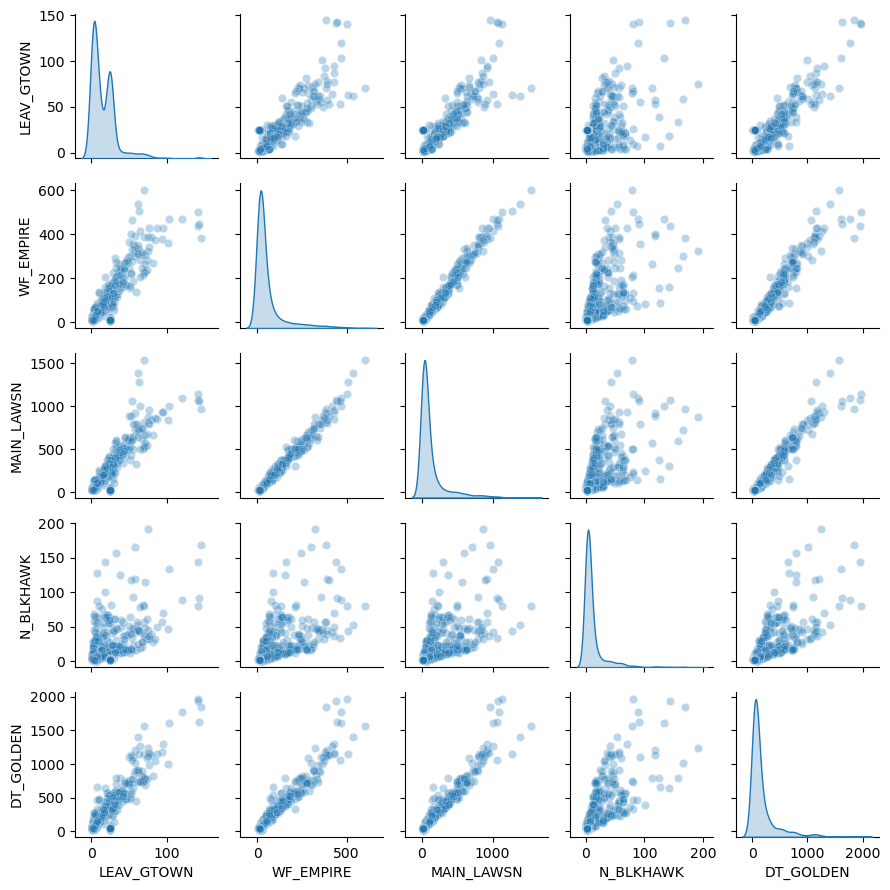

In [9]:
discharge_pairplot(df)
plt.show()

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 2b</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 2b. Then describe your exploratory data analysis of any target and input features of note. Include the following:
    <ul>
        <li>Do variables follow diurnal or annual patterns generally as expected?</li>
        <li>Do the variables have the expected ranges of values? Do any variables appear to include major outliers?</li>
        <li>Which stations appear to be most correlated to the variables at Mt Mitchell? Why?</li>
        <li>Include any <i>important</i> plots to illustrate your conclusions. Limit yourself to 5 plots. <br><i>To copy a plot image, hold shift, right click on the image, then select Copy.</i></li>
    </ul>
    </p>
</div>

<br>

### Part 2c: Create a data splitting strategy

Next we create a data splitting strategy. Data splitting refers to the process of dividing data into three groups: training, validation, and testing. Each of these groups represent a part of the iterative process for machine learning model development. 

- Training data is the largest subset, usually around 60-80% of the total data, and is used to initially train the model. 
- Validation data is roughly 10-20% of the total data, and is used to validate the effectiveness of the training process. 
- Testing data is also roughly 10-20% of the total data, and is used to test the final refined model before using it on new, unseen data.

Each group should be separate to ensure no single group will bias the model. In this model, the data will be randomly split into these groups, but you decide the proportions of data for each group. Input your percentages in the blanks below, ensuring all percentages equal 100%.

> **Instructions**
> 
> Execute the two cells below.
>
> In the Dataset Split Percentages widget, select the proportions of the total dataset you wish to use in each group by typing in each box. Use values 0-100, ensuring that the sum of all three boxes equals 100.
>
> Select Submit after making your selection.

In [10]:
from analysis_tech import year_selection_widget

In [ ]:
widget, get_years = year_selection_widget()

> **Instructions**
> 
> Execute the three cells below to execute the functions to split the data according to the percentages you submitted above.
>
> *Note: The "true test" group is the subset of times where MITC was offline, Sept 27, 2024 and onward.*

In [12]:
# This is used to grab the values from the widget above (no need to change)
years = get_years()
training = years['training']
validation = years['validation']
testing = years['testing']

In [13]:
from analysis_tech import split_data_temporal

In [14]:
# Use the function
X_train, y_train, X_val, y_val, X_test, y_test, X_true_test, y_true_test = split_data_temporal(df,
                                                                                               train_years=training,
                                                                                               val_years=validation,
                                                                                               test_years=testing,
                                                                                               target_column='daily_mean_discharge_DT_GOLDEN')

<br>
<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 2c</p>
    <ul>
        <li><b>In your Machine Learning Model Handbook Exercise 2c,</b> input your data splitting strategy. </li>
    </ul>
</div>
<br>

***

## Part 3: Model Development
Next begins the iterative process of creating, evaluating, and refining your machine learning model. You will start with an initial model, and keep track of your subsequent trials in your Machine Learning Model Handbook. 
<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>

### Part 3a: Choose Algorithm
First, you will choose an algorithm to train. You have two options: the *MultiXGBRegressor* and the *MultiLinearRegressor*. Both have pros and cons for this task. Choose one for your initial model, but you may choose to test the other algorithm in subsequent trials. 

<div class="alert alert-info" role="alert">
    <p class="admonition-title" style="font-weight:bold">About the Algorithms</p>
    <p class="admonition-title" style="font-weight:bold">MultiXGBRegressor (XGBoost)</p>
    <ul>
        <li>Handles a Wide Range of Data Distributions: XGBoost is capable of modeling both linear and non-linear relationships, making it suitable for data with complex, varied distributions.</li>
        <li>Prone to Overfitting: XGBoost can easily overfit to training data, especially when the dataset is small or noisy. This may lead to poor generalizations when making predictions on new data. </li>
    </ul>
    <p class="admonition-title" style="font-weight:bold">MultiLinearRegressor</p>
    <ul>
        <li>Simple and Interpretable: As a linear model, it is easy to understand and interpret within the context of the physical world, making it a great choice for finding clear relationships between features and predictions.</li>
        <li>Struggles with Non-Uniform Data Distributions: For datasets with non-linear patterns or skewed distributions, multiple linear regression may fail to capture the underlying patterns, leading to biased or inaccurate predictions.</li>
</div>

> **Instructions**
> 
> Execute the two cells below.
>
> After executing `algorithm_selection()`, select the corresponding button to select your desired algorithm.

In [ ]:
# imports needed to run the machine learning workflow

from xgboost import XGBRegressor
import time 
from sklearn.linear_model import LinearRegression
from analysis_tech import algorithm_selection

In [ ]:
selected_algo = algorithm_selection()

<br>

### Part 3b: Choose input features

Given your data exploration, you must now choose the stations to use as input features to the algorithm you just selected. You may choose as many input stations as you'd like, however, recall that more stations does not always create a better model. Think strategically based on the evidence. 

<center><a href="https://ncar.maps.arcgis.com/apps/instant/3dviewer/index.html?appid=50f8315bfb4742ce9468e25eaf53c12e" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/stationmap_pro.png" width="500 px"></a><br>
<i>Click to open interactive map</i></center><br>

> **Instructions**
> 
> Execute the two cells below.
>
> After executing `create_station_selector()`, select the stations you would like to use to train your model. You may select as many or as few as you consider necessary.

In [ ]:
from analysis_tech import create_station_selector

In [ ]:
station_selector = create_station_selector()

> **Instructions**
> 
> Execute the cell below to commit your station selection. The output will also be used in describing subsequent evaluation metrics. 

In [ ]:
# To get selected stations at any time:
def get_selected_stations(selector):
    return [station for station, checkbox in selector.items() if checkbox.value]

selected = get_selected_stations(station_selector)
selected

This next block of code takes the full dataset and removes (filters) any stations that were not selected above. We do this for all groups (training, validation, and testing). 

The "true test" group is the subset of times where MITC was offline, Sept 27, 2024 and onward.

<br>

> **Instructions**
> 
> Execute the two cells below. In the printout display, you will see the number of features (columns) in the original dataset, and the number of features in the filtered dataset. 

In [ ]:
from analysis_tech import filter_dataframe

In [ ]:
X_train_filtered     = filter_dataframe(X_train,     selected)
X_val_filtered       = filter_dataframe(X_val,       selected)
X_test_filtered      = filter_dataframe(X_test,      selected)
X_true_test_filtered = filter_dataframe(X_true_test, selected)

<br>

### Part 3c: Train the Algorithm

The training process is what transforms the machine learning algorithm into a supervised machine learning model. The cells below start the training process with all the decisions you previously made. 

> **Instructions**
> 
> Execute the two cells below.
>
> After executing `train_button()`, select the Train Algorithm button to initiate the training process. A progress printout will display below the button while the process runs. 

In [ ]:
from analysis_tech import train_button

In [ ]:
model_choice = selected_algo()
trained_model = train_button(model_choice, X_train_filtered, y_train)

<br>

### Part 3d: Validate the Model

The validation step uses validation data to evaluate how well the training process performed. By using a separate dataset to evaluate performance, we get a better sense of how well the model can generalize to new inputs. We focus on two main evaluation metrics: Root Mean Square Error (RMSE) and R². 

<div class="alert alert-info" role="alert">
    <p class="admonition-title" style="font-weight:bold">About the Evaluation Metrics</p>
    <p class="admonition-title" style="font-weight:bold">Root Mean Square Error (RMSE)</p>
    <ul>
        <li>A measure of how large a typical prediction error is</li>
        <li>Reports the typical magnitude of error in the original units (degrees, %, mph, etc)</li>
        <li>The closer to 0, the better the model accuracy</li>
        <li>Better reflects the accuracy of predictions in real-world situations</li>
        <li>Dependent on the range of values (scale) of the dataset, making comparisons among variables more difficult</li>
    </ul>
    <p class="admonition-title" style="font-weight:bold">R²</p>
    <ul>
        <li>A measure of how well the model explains the variation in the dataset</li>
        <li>Uses a standardized scale (0-1) for comparing models across different trials</li>
            <ul>
                <li>In some cases, R² may be negative. This means that the model made a prediction worse than the dataset average (or climatology prediction).</li>
            </ul>
        <li>The closer to 1, the better the model accuracy</li>
        <li>Assumes that the input data have a linear relationship</li>
        <li>Only measures correlation among input data, cannot distinguish good and bad predictions in the real world</li>
    </ul>
</div>


> **Instructions**
> 
> Execute the two cells below.
>
> After executing `model_eval_MITC()`, your model's validation metrics will appear below as a printout. 

In [ ]:
# Import the Python libraries that calculate the evaluation metrics
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error

from analysis_tech import model_eval

In [ ]:
model_eval(trained_model(), X_test_filtered, y_test)

<br>

### Part 3e: Evaluate and Refine the Model

Examine the results of the model validation. What do each mean? Could they be improved? Review the descriptions of the evaluation metrics, then complete the next exercise. 

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3e</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 3e. </p>
    <p>Paste your validation evaluation metrics in the designated box. </p>
    <p>Then describe the results of your initial model validation. Include the following:</p>
    <ul>
        <li>Which variables have favorable evaluation metrics? Which variables don’t perform as well?</li>
        <li>How do you interpret these statistics in the context of the physical world?</li>
        <li>What changes will you make to try to improve these statistics in the next iteration?</li>
    </ul>
</div>

<br>

### Part 3f: Iterative Refinement Trials

Your first trial is complete! Now you'll create new trials to improve the evaluation metrics from the validation phase. You may complete as many trials as you like until you are satisfied with the evaluation metrics, or they no longer improve with new trials. 

> **Instructions**
> 
> Execute the code cells below, selecting your desired model configurations after executing each cell.
> 
> After each new trial, you will copy the validation metrics in your handbook document. See **Exercise 3f**.
>
> You may complete as many trials in this section (3f) as you like until you are satisfied with the evaluation metrics, or they no longer improve with new trials. 


#### New trial: Choose algorithm 

In [ ]:
selected_algo = algorithm_selection()

#### New trial: Choose input features

<center><a href="https://ncar.maps.arcgis.com/apps/instant/3dviewer/index.html?appid=50f8315bfb4742ce9468e25eaf53c12e" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/stationmap_pro.png" width="500 px"></a><br>
<i>Click to open interactive map</i></center><br>

In [ ]:
station_selector = create_station_selector()

In [ ]:
# Execute this cell after selecting stations
selected = get_selected_stations(station_selector)
X_train_filtered     = filter_dataframe(X_train,     selected)
X_val_filtered       = filter_dataframe(X_val,       selected)
X_test_filtered      = filter_dataframe(X_test,      selected)
X_true_test_filtered = filter_dataframe(X_true_test, selected)

#### New trial: Train algorithm

In [ ]:
model_choice = selected_algo()
trained_model = train_button(model_choice, X_train_filtered, y_train)

#### New trial: Validate model

In [ ]:
model_eval(trained_model(), X_test_filtered, y_test)

<br>
<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3f</p>
    <ul>
        <li><b>In your Machine Learning Model Handbook Exercise 3f,</b> paste the full output of each of your validation trials, one per box. </li>
        <li>You may complete as many trials as you like until you are satisfied with the evaluation metrics, or they no longer improve with new trials. When complete, move on to the next part below. </li>
    </ul>
</div>
<br>

### Part 3g: Test Model

<div class="alert alert-warning" role="alert">
<p class="admonition-title" style="font-weight:bold">Important</p>
    For testing, your model needs to be in a state with your desired algorithm and input feature stations. If you haven't already, go back and run through the cells in Part 3f with your final choices one last time. This ensures that your final testing process will be executed with your desired choices. 
</div>
<br>
At this point, you have a trained model with validation metrics you are satisfied with. Next, it's time to test the model on brand new data: the testing dataset. The testing process mimics how the model would be used in a real-world process in a final, unbiased way. 
<br><br>
Testing looks very similar to validation. The model makes predictions based on the input features in the testing dataset, we calculate RMSE and R² as the testing metrics. 

> **Instructions**
> 
> Execute the cell below.
>
> After executing `model_eval_MITC()`, your model's testing metrics will appear below as a printout. 

In [ ]:
model_eval(trained_model(), X_val_filtered, y_val, eval_type='Testing')

### Part 3h: Evaluate and Justify

With your model trained, validated, and tested, you can now plot the predicted model output alongside the real data before the Mt. Mitchell station went offline. You may use this information to help you address your final model justification. 

> **Instructions**
> 
> Execute the three cells below.
>
> The plot displays the historical and model-predicted data at Mt. Mitchell in the calendar year 2024. 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y_pred = trained_model().predict(X_true_test_filtered)

In [ ]:
from analysis_tech import plot_weather_comparison

In [ ]:
fig, axs = plot_weather_comparison(
   df=df,
   y_pred=y_pred, 
   transition_date=pd.Timestamp('2024-09-28')
)
plt.show()

#### Your final decision

Given all your evaluation, it's time to make a final decision on whether you believe this model provides sufficient skill for the needs of the situation. Go back and review your problem statement. Does this model deliver the results needed?

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3h</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 3h.</p>
    <p>Paste your testing evaluation metrics in the designated box. </p>
    <p>Then  make a final decision on whether this model delivers on the results needed with supporting justification. Include the following:
    <ul>
        <li>Which environmental variables had the best evaluation metrics? List some physical scientific reasons why this may be the case.</li>
        <li>Is this model ready for use in the real world? Why or Why not?</li>
        <li>What other possible changes could further improve this model?</li>
    </ul>
    </p>
</div>

***

#### Conclusion

Scientific research rarely yields a simple and straightforward right answer. Instead, scientists analyze evidence, compare it to known physical processes, and make informed recommendations based on data and statistics. As you learned in *Machine Learning Foundations in the Earth System Sciences*, machine learning is not an exact science, rather, it generates approximations from large datasets. This makes evaluating model quality complex. What one scientist considers a high-performing model may be insufficient to another. What matters most is your ability to justify your results within the context of physical science and the real-world stakes. As you continue your studies, remember that these models are not just numbers. They are representations of the physical world.

***


#### Acknowledgements

This work was supported by NSF Unidata under award #2319979 from the US National Science Foundation. Any opinions, findings, and conclusions or recommendations expressed in this material are those of the author(s) and do not necessarily reflect the views of the National Science Foundation. 

We thank the <a href="https://climate.ncsu.edu/" target="blank">North Carolina State Climate Office</a> for contributing <a href="https://doi.org/10.1175/JTECH-D-22-0079.1" target="blank">NC ECONet data</a> and media to this project. 